In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

In [2]:
iris_df = pd.read_csv("..\iris-data.csv")

In [3]:
iris_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#the first step is to review if I have nulls in my dataset. I can see that there are 5 nulls in the "petal_width_cm" column.
iris_df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [5]:
#Now that I know that I have nulls, I have to identify them, and see the entire row in order to decide if it is better to 
#eliminate the entire row or replace the NaN value with the mean. 
null_values = iris_df[iris_df["petal_width_cm"].isnull()]
null_values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [6]:
#Now that I see that the rest of the columns have values that seem to have correct values, I decide to keep the rows since 
#the dataset is not that big, and I prefer to keep as much information as possible. 
#In this case I will replace the NaN with the mean. 
# Since all the NaN are from the same class, I will use the mean of that class.
iris_clean_df = iris_df.copy()
mean_iris_setosa = iris_df[iris_df["class"] == "Iris-setosa"]["petal_width_cm"].mean()
mean_iris_setosa

0.25

In [7]:
iris_clean_df['petal_width_cm'] = iris_clean_df['petal_width_cm'].fillna(mean_iris_setosa)

In [8]:
#Now my dataset has no NaN values
iris_clean_df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [9]:
#Since I have one categorical feature, I want to review all the entries, in order to review that the entries in the "class" column are unified. 
iris_df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [10]:
#We can see that there are two classes that are duplicated because either they were entered with typo error 
#(like Irirs_setossa that has an extra "s") or simply because the same "class" can be entered differently by each source 
#(example someone entered "Iris-versicolor", while others entered the information as "versicolor"). 
#This is very common in real life datasets.
#I will keep the name "Iris-versicolor" as is the one that seems the standard. 
iris_clean_df['class'] = iris_clean_df['class'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'])
iris_clean_df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [11]:
#Now that I have my ""clas" data standarized, I can start a visual exploratory analisys, 
#to review values that are might have been wrongly entered or that are simply outliers.
# I will use describe() to check the mean, min and max of each column to first identify possible weird values that I can study more in detail with visuals.
iris_clean_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.203667
std,1.312781,0.433123,1.764420,0.763252
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\irene\anaconda3\envs\sklearn_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


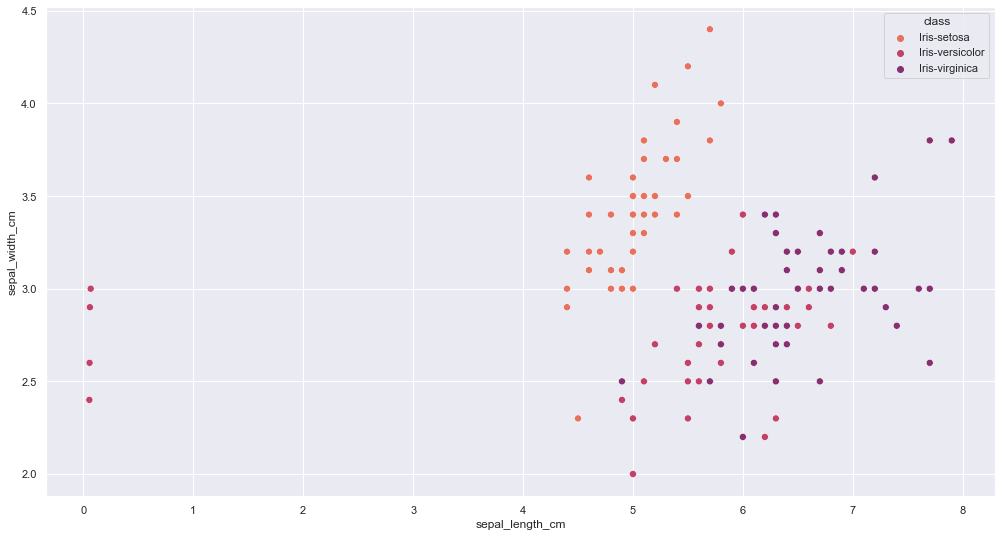

In [12]:
#From the information above, I can see that in columm "sepal_lengh_cm" there seems to be at least one value (the min) really out of range, so I will plot my sepal columns to check how my data looks like.
plt.figure(figsize=(17,9))
sns.scatterplot(iris_clean_df['sepal_length_cm'],iris_clean_df['sepal_width_cm'],hue =iris_clean_df['class'],s=50,palette = "flare");
plt.show()

In [13]:
#I can see that there are 4 values that are completely out of range in "sepal_lenght_cm". 
#To identify them, I will make a filter for all values that are less than 4 in the column. 
outlier_sepal = iris_df[iris_df["sepal_length_cm"] < 4]
outlier_sepal

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [14]:
#There are 5 values that seem to have an error, it is most likely that they were not transform to cm and are in mts. 
#So I will #convert them, by multiplying them by 100

def convert_cms(x):
    if x < 4:
        real_value = x*100
        return real_value
    else:
        return x
    
iris_clean_df['sepal_length_cm'] = iris_clean_df['sepal_length_cm'].apply(convert_cms)
iris_clean_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\irene\anaconda3\envs\sklearn_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


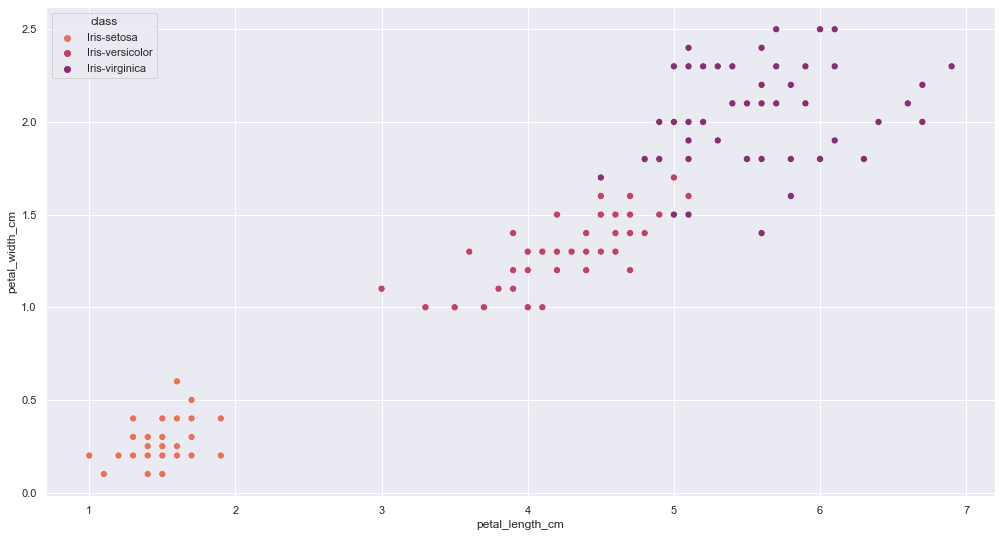

In [15]:
# Now that I have arranged those values, I will proceed to plot the petal columns, to see what I have
plt.figure(figsize=(17,9))
sns.scatterplot(iris_clean_df['petal_length_cm'],iris_clean_df['petal_width_cm'],hue =iris_clean_df['class'],s=50, palette = "flare");
plt.show()

In [16]:
#From the plot, I cannot see really clearly, the outlines, so I will calculate the mean and median for the all numerical features.
iris_clean_df.groupby('class').agg(['mean', 'median'])

sepal_length_cm        sepal_width_cm        petal_length_cm  \
                           mean median           mean median            mean   
class                                                                          
Iris-setosa               5.034   5.00          3.418    3.4           1.464   
Iris-versicolor           5.936   5.90          2.772    2.8           4.260   
Iris-virginica            6.546   6.45          2.974    3.0           5.552   

                       petal_width_cm         
                median           mean median  
class                                         
Iris-setosa       1.50          0.251    0.2  
Iris-versicolor   4.35          1.326    1.3  
Iris-virginica    5.55          2.034    2.0

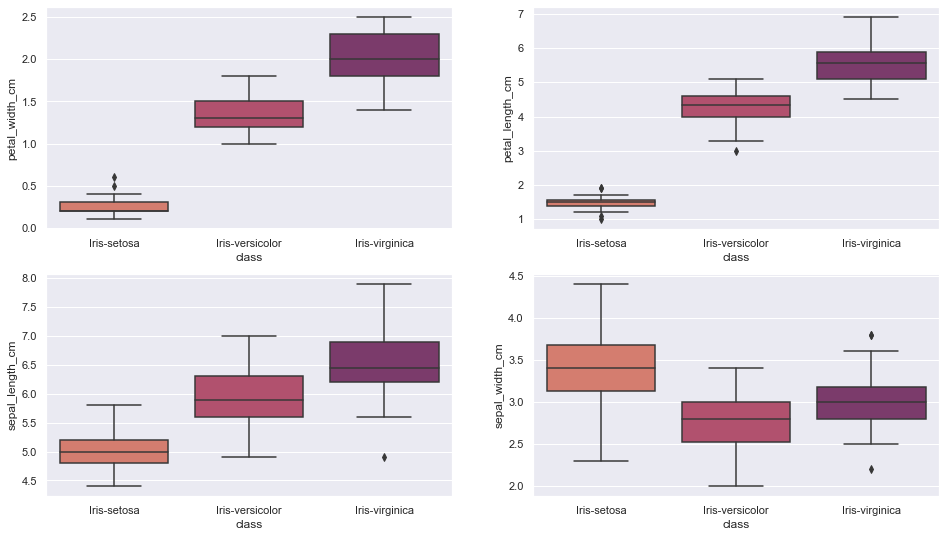

In [17]:
# I plot to see the outliners for each class
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal_width_cm', x= 'class', data=iris_clean_df, ax=axes[0, 0], palette = "flare")
sns.boxplot( y='petal_length_cm', x= 'class', data=iris_clean_df, ax=axes[0, 1], palette = "flare")
sns.boxplot( y='sepal_length_cm', x= 'class', data=iris_clean_df, ax=axes[1, 0], palette = "flare")
sns.boxplot( y='sepal_width_cm', x= 'class', data=iris_clean_df, ax=axes[1, 1], palette = "flare")
plt.show()

In [18]:
cols = ['sepal_length_cm', 'sepal_width_cm','petal_length_cm','petal_width_cm']

Q1 = iris_clean_df[cols].quantile(0.25)
Q3 = iris_clean_df[cols].quantile(0.75)
IQR = Q3 - Q1

iris_clean_df = iris_clean_df[~((iris_clean_df[cols] < (Q1 - 1.5 * IQR)) |(iris_clean_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
iris_clean_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


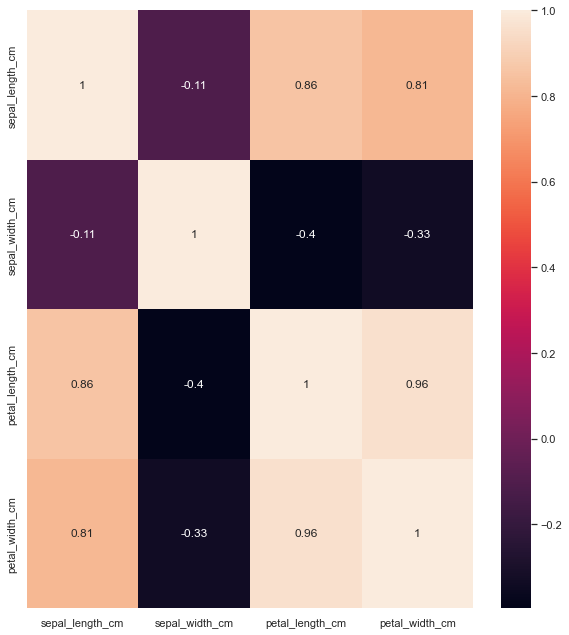

In [19]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_clean_df.corr(),annot=True)
plt.plot();

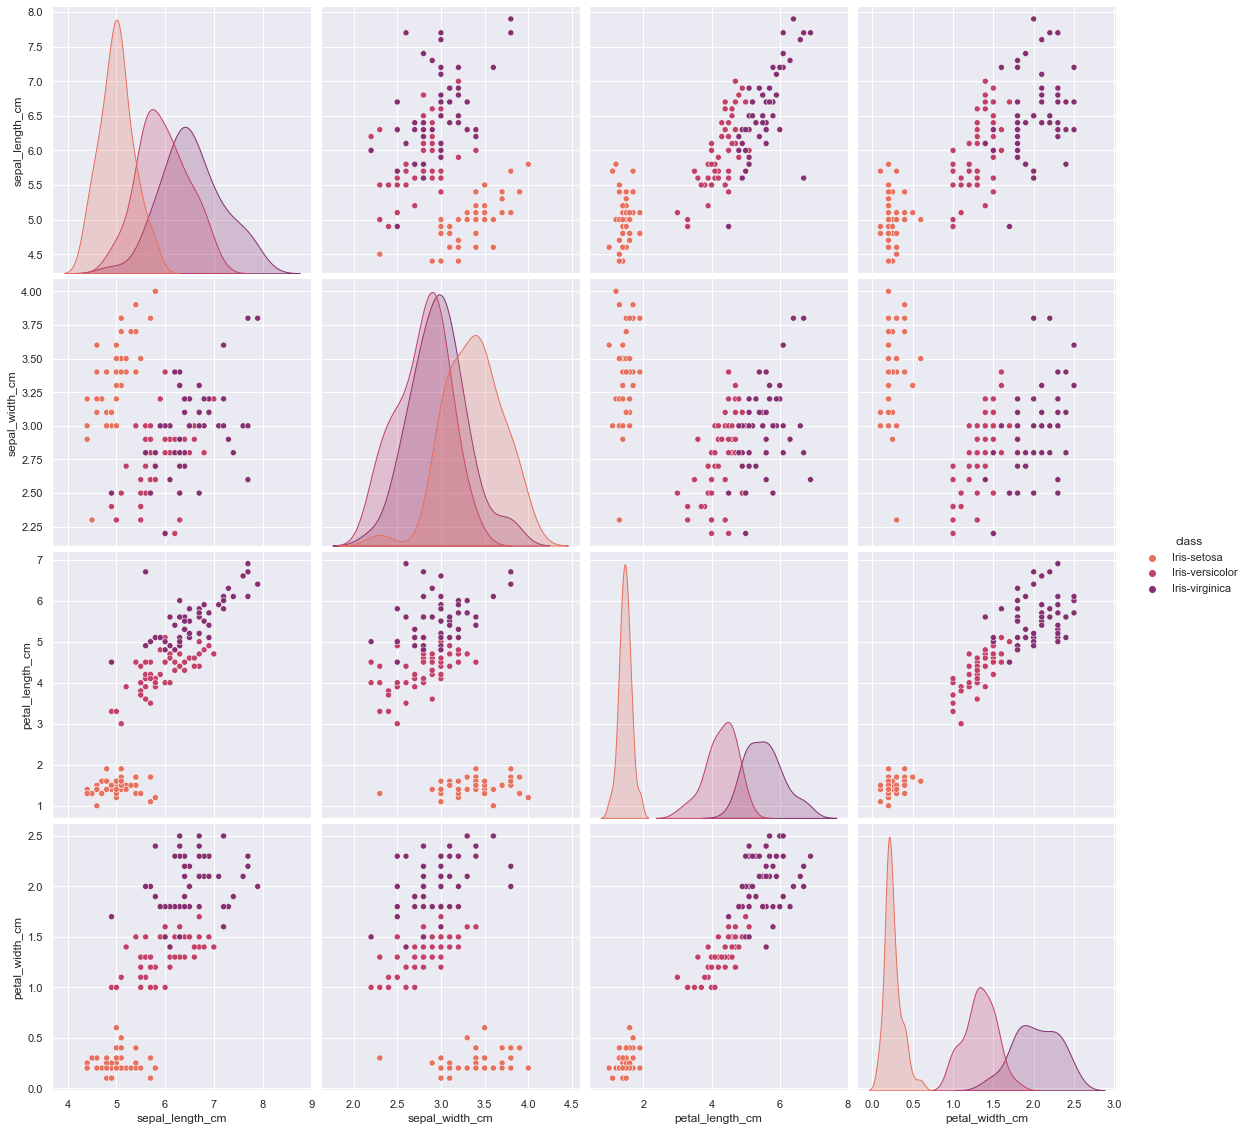

In [20]:
sns.pairplot(iris_clean_df,hue='class',height=4,palette = "flare");

In [21]:
#I believe the information is quite clean after the steps taken. 
#The last step in order to proceed would be encoding the categorical feature. 

cat_features = ['class']
num_features = ['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']
iris_clean_df['class']=iris_clean_df['class'].astype('category')
cat_df = pd.get_dummies(iris_clean_df[cat_features])
num_df = iris_clean_df.loc[:,num_features]
iris_clean_df = pd.concat([num_df,cat_df],axis=1)

In [22]:
#Dataset ready. 
iris_clean_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,2.3,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [23]:
iris_clean_df.to_csv('../iris-data-cleaned.csv')